Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and Processing

In [6]:
# loading the csv data to Pandas Data Frame
gold_data= pd.read_csv('/gld_price_data.csv')

In [8]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
#print last 5 rows of the data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [11]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
#checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1.Positive Correlation
2.Negative Correlation

In [14]:
correlation=gold_data.corr()

<ipython-input-14-a848558ce65b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

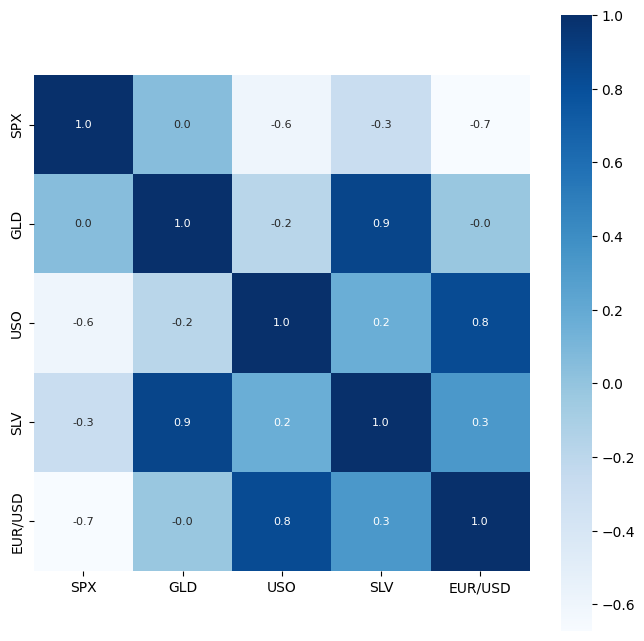

In [15]:
#constructing a heatmap to understand the coorelation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f' ,annot=True,annot_kws={'size':8},cmap='Blues')

In [16]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


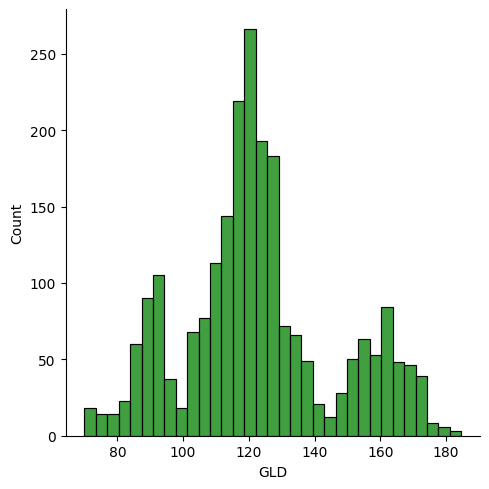

In [17]:
#checking the distribution of the GLD price
sns.displot(gold_data['GLD'],color='green')

Splitting the features and target

In [19]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [20]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Separating into Training data and test data

In [22]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model training random forest algorithm

In [23]:
regressor=RandomForestRegressor(n_estimators=100)

In [25]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [26]:
#prediction on test data
test_data_prediction =regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[168.67539937  82.18710009 116.04509995 127.69860052 120.89690108
 154.98989743 150.41159858 125.9701001  117.42369871 126.0628005
 116.88770141 171.79150114 141.58649875 167.67429837 114.97750015
 117.85390035 138.36740282 169.9795008  160.01050299 159.09029912
 155.13820015 125.38430017 176.83319908 157.7061031  125.25970035
  93.60199994  78.1654998  120.81750009 119.11249963 167.50139949
  88.13760042 125.23840001  91.09110078 117.70220034 121.18169933
 136.57000086 115.46710107 115.04530062 148.28540025 107.28170092
 104.52990254  87.20259785 126.45040077 118.13559976 154.09719927
 119.66060026 108.38320013 108.08199842  93.24840079 127.13999752
  75.48920021 113.66629924 121.31790034 111.21159914 118.91629908
 120.65859936 157.81990027 167.48750107 146.91429716  85.80119883
  94.32620035  86.76339917  90.37800038 118.99720107 126.5329007
 127.5494     169.20550041 122.20529929 117.38119894  98.55180043
 167.8973018  142.85229851 132.51430294 121.20340242 120.80189966
 119.5863006

In [28]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9889040532785836


Compare the actual values and predicted values in a plot

In [29]:
Y_test=list(Y_test)

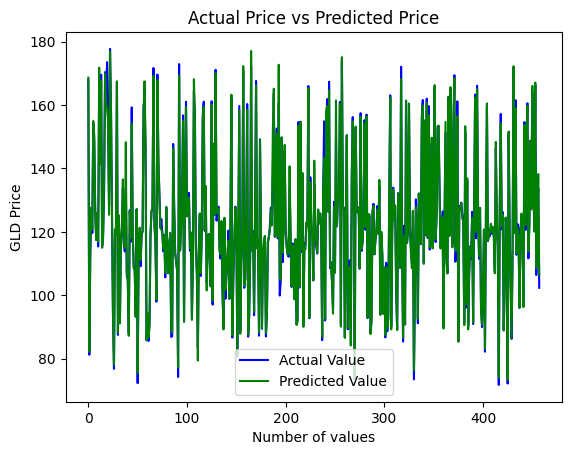

In [32]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()